In [50]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
%matplotlib inline

## Татьяна Колмакова
## Задание по практикуму №2 в осеннем семестре 2016-2017 учебного года.
### Используемая версия языка Python - 3.5

Для удобства просмотра разобьем задание на две части. 
* Первая часть заключена в работе с датасетом **MNIST** (база рукописных цифр). 
* Вторая часть в работе с датасетом **20 newsgroups**, содержащим в себе 20 различных подборок с новостных сайтов.


## Первая часть

Загружаем датасет:

In [3]:
mnist = fetch_mldata("MNIST original")

Делим выборку на обучающую и тестовую. Набор устроен так, что первые 60000 объектов являются обучающими, а остальные 10000 - тестовыми:

In [4]:
train_data = mnist.data[:60000]
train_target = mnist.target[:60000]
print(train_target)
test_data = mnist.data[60000:]
test_target = mnist.target[60000:]

[ 0.  0.  0. ...,  9.  9.  9.]


Посмотрим, что представляет собой некоторые объекты из датасета. Визуализируем по пять цифр из каждого класса.

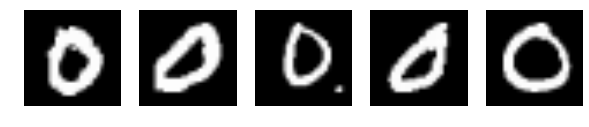

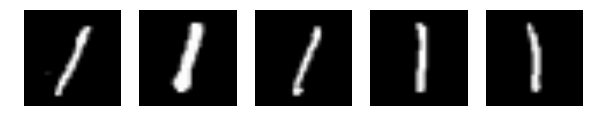

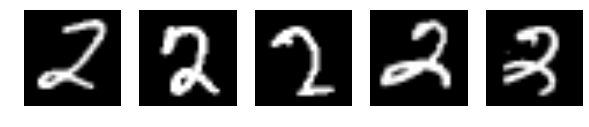

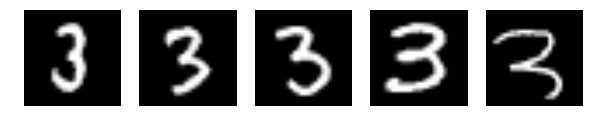

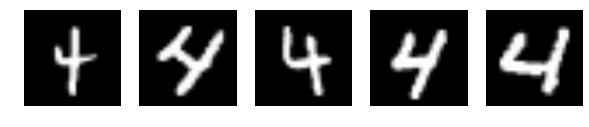

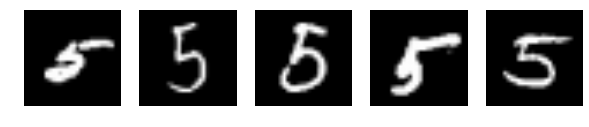

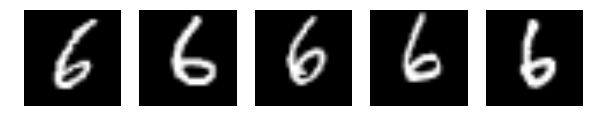

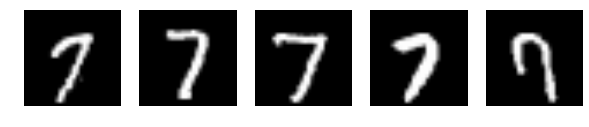

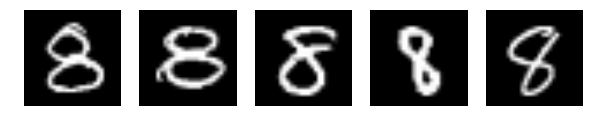

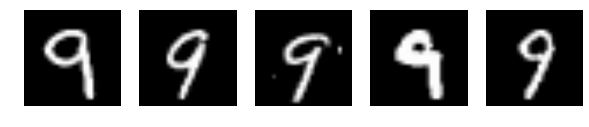

In [41]:
for number in range(10):
    for repeat in range(5):
        ind = np.random.randint(0, len(train_target))
        while train_target[ind] != number:
            ind = np.random.randint(0, len(train_target))

        img = np.reshape(train_data[ind], (28, 28))[:, :, np.newaxis]
        img = np.repeat(img, 3, axis=2)
        plt.figure(number, figsize=(10, 6))
        plt.subplot(1, 5, repeat+1)
        plt.axis("off")
        plt.imshow(img, cmap = "Greys")

Как можно заметить, не все цифры легко различимы. Возникают сложности с распознаванием семерки, можно перепутать тройки и двойки.

Теперь оценим время работы различных реализаций при количестве соседей = 5 и количестве признаков 
10, 20, 100

In [10]:
import nearest_neighbors as knn
import time

Из множества признаков выберем случайным образом некоторое подмножество:

Из данных тестов видно, что лучшим является взвешенный алгоритм с косинусной метрикой.

In [60]:
indexes = np.random.permutation(train_data.shape[1])[:100]

Для наглядности построим графики. Используются графики со сплошными линиями в целях более наглядного представления. Графики с тремя точками очень сложно воспринимаемы. 

Анализ времени работы производится с использованием евклидовой метрики. 

Для каждого алгоритма оценим его скорость работы при различных количествах используемых признаков.

In [57]:
def get_time_graph(clf):
    length = [10, 20, 100]
    fit_time = []
    find_time = []
    for i in length:
        start_fit = time.clock()
        print('*******'*8)
        print('FOR LENGTH = ', i)
        print ('fitting time:')
        %time clf.fit(train_data[:, indexes[:i]])
        end_fit = time.clock()
        start_find = time.clock()
        print ('finding neighbors time:')
        %time clf.find_kneighbors(test_data[:, indexes[:i]])
        end_find = time.clock()
        print('*******'*8)
        fit_time.append(end_fit-start_fit)
        find_time.append(end_find-start_find)
    plt.figure(1)
    plt.plot(length, fit_time, linewidth=2.0)
    plt.title('Time fo fitting')
    plt.xlabel('number of features')
    plt.ylabel('time')
    plt.figure(2)
    plt.plot(length, find_time, linewidth=2.0)
    plt.title('Time fo find 5 neighbors')
    plt.xlabel('number of features')
    plt.ylabel('time')
    plt.show()

### Brute:

In [58]:
classifier = knn.KNN_classifier(k=5, strategy='brute', metric='euclidean', weights=False, test_block_size=1000)

********************************************************
FOR LENGTH =  10
fitting time:
CPU times: user 16.5 ms, sys: 93.9 ms, total: 110 ms
Wall time: 177 ms
finding neighbors time:
CPU times: user 17.4 s, sys: 18.9 s, total: 36.4 s
Wall time: 42.8 s
********************************************************
********************************************************
FOR LENGTH =  20
fitting time:
CPU times: user 28.2 ms, sys: 127 ms, total: 155 ms
Wall time: 232 ms
finding neighbors time:
CPU times: user 15.1 s, sys: 9.75 s, total: 24.8 s
Wall time: 28 s
********************************************************
********************************************************
FOR LENGTH =  100
fitting time:
CPU times: user 85 ms, sys: 7.38 ms, total: 92.4 ms
Wall time: 101 ms
finding neighbors time:
CPU times: user 18.8 s, sys: 11.8 s, total: 30.6 s
Wall time: 36.3 s
********************************************************


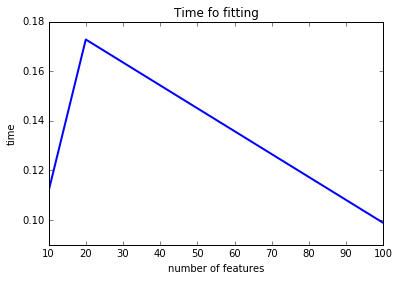

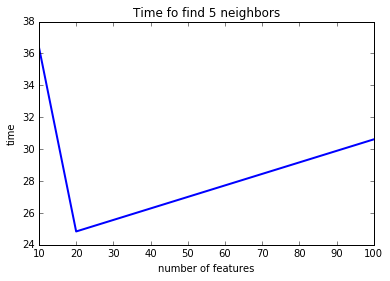

In [61]:
get_time_graph(classifier)

### My own

In [29]:
classifier = knn.KNN_classifier(k=5, strategy='my_own', metric='euclidean', weights=False, test_block_size=1000)

********************************************************
FOR LENGTH =  10
fitting time:
CPU times: user 14.8 ms, sys: 1.78 ms, total: 16.5 ms
Wall time: 14.2 ms
finding neighbors time:
CPU times: user 1min 24s, sys: 15.4 s, total: 1min 40s
Wall time: 1min 47s
********************************************************
********************************************************
FOR LENGTH =  20
fitting time:
CPU times: user 21.6 ms, sys: 62.8 ms, total: 84.4 ms
Wall time: 83.2 ms
finding neighbors time:
CPU times: user 2min 13s, sys: 20.6 s, total: 2min 33s
Wall time: 3min 1s
********************************************************
********************************************************
FOR LENGTH =  100
fitting time:
CPU times: user 86.2 ms, sys: 142 ms, total: 228 ms
Wall time: 328 ms
finding neighbors time:
CPU times: user 3min 31s, sys: 20.8 s, total: 3min 52s
Wall time: 4min 20s
********************************************************


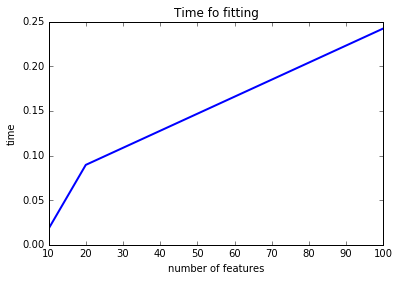

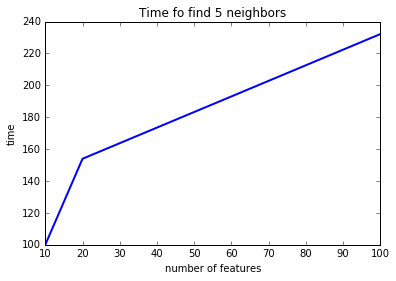

In [30]:
get_time_graph(classifier)

### Ball tree

In [31]:
classifier = knn.KNN_classifier(k=5, strategy='ball_tree', metric='euclidean', weights=False, test_block_size=1000)

********************************************************
FOR LENGTH =  10
fitting time:
CPU times: user 8.42 s, sys: 345 ms, total: 8.77 s
Wall time: 9.25 s
finding neighbors time:
CPU times: user 10.7 s, sys: 176 ms, total: 10.9 s
Wall time: 11.5 s
********************************************************
********************************************************
FOR LENGTH =  20
fitting time:
CPU times: user 8.27 s, sys: 134 ms, total: 8.4 s
Wall time: 8.46 s
finding neighbors time:
CPU times: user 30.8 s, sys: 389 ms, total: 31.2 s
Wall time: 31.8 s
********************************************************
********************************************************
FOR LENGTH =  100
fitting time:
CPU times: user 11.9 s, sys: 223 ms, total: 12.1 s
Wall time: 12.2 s
finding neighbors time:
CPU times: user 2min 3s, sys: 552 ms, total: 2min 3s
Wall time: 2min 4s
********************************************************


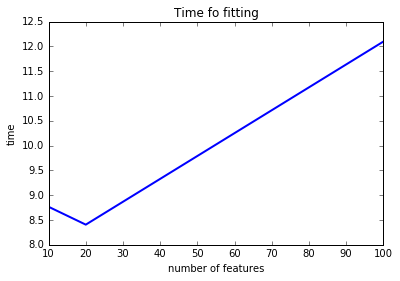

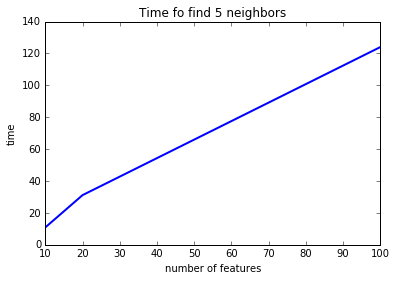

In [32]:
get_time_graph(classifier)

### KD tree

In [33]:
classifier = knn.KNN_classifier(k=5, strategy='kd_tree', metric='euclidean', weights=False, test_block_size=1000)

********************************************************
FOR LENGTH =  10
fitting time:
CPU times: user 6.71 s, sys: 64.7 ms, total: 6.77 s
Wall time: 6.75 s
finding neighbors time:
CPU times: user 4.93 s, sys: 17.6 ms, total: 4.95 s
Wall time: 4.96 s
********************************************************
********************************************************
FOR LENGTH =  20
fitting time:
CPU times: user 7.82 s, sys: 84.1 ms, total: 7.91 s
Wall time: 7.85 s
finding neighbors time:
CPU times: user 7.32 s, sys: 18.3 ms, total: 7.34 s
Wall time: 7.35 s
********************************************************
********************************************************
FOR LENGTH =  100
fitting time:
CPU times: user 10.4 s, sys: 115 ms, total: 10.5 s
Wall time: 10.4 s
finding neighbors time:
CPU times: user 1min 41s, sys: 561 ms, total: 1min 41s
Wall time: 1min 42s
********************************************************


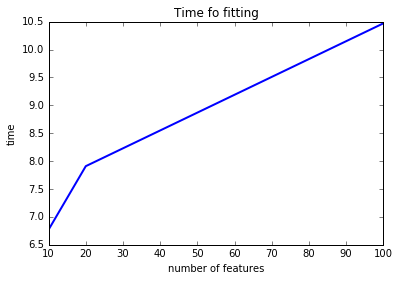

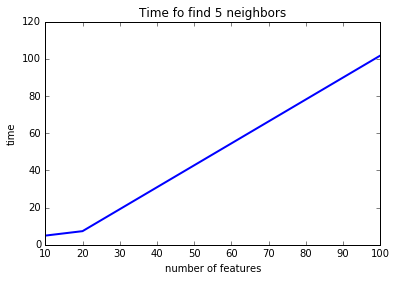

In [34]:
get_time_graph(classifier)

Из построенных графиков видно, что скорость обучения и время поиска ближайших соседей увеличивается с ростом количества признаков. Алгоритмы, строящие вспомогательные структуры данных, очень чувствительны к увеличению размерности. Именно поэтому алгоритмы, основанные на матрице расстояний, гораздо эффективнее на большом количестве признаков. 

Так же можно наблюдать, что время обучения у алгоритмов 'kd_tree' и 'ball_tree' занимает больше времени.

Можно выделить промежуточные выводы:
    - При количестве признаков менее 20 эффективнее использовать сложные структуры данных.
    - Деревья требуют большего времени для своего построения, поэтому обучение занимает больше времени.
    - При увеличении количества признаков лучше использовать матрицу попарных расстояний.

## Кросс-валидация

Оценим с помощью кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) и скорость метода k ближайших соседей в зависимости от следующих параметров:
 - k принимает значение от 1 до 10 (для оценки точности).
 - Метрика принимает значения 'euclidean' и 'cosine'.

Оценим точность для каждого параметра k с помощью графиков. Этот способ выбран как наиболее наглядный.

In [5]:
import cross_validation as cv

In [6]:
num_folds = 3
folds = cv.kfold(len(train_data), num_folds)

Все дальнейшие измерения будем проводить для алгоритма brute, так как ball_tree и kd_tree не работают с косинусной метрикой и гораздо медленнее, ведь мы будем использовать все пространство признаков.

In [12]:
def accuracy_plot(weights):
    k_list = list(range(1, 11))
    metrics = ['euclidean', 'cosine']
    
    for fig, metric in enumerate(metrics):
        plt.figure(fig)
        acc = cv.knn_cross_val_score(X=train_data, 
                                     y=train_target, 
                                     k_list=k_list, 
                                     score='accuracy', 
                                     cv=folds, 
                                     weights=weights, 
                                     metric=metric, 
                                     strategy='brute', 
                                     test_block_size=None)
        
        plt.plot(k_list, [np.mean(value) for value in acc.values()], linewidth=2.0)
        plt.title('Accuracy depends on k %s' % metric)
        plt.xlabel('k')
        plt.ylabel('accuracy')
        plt.show()

*
*
*
*
*
*
*
*
*
*


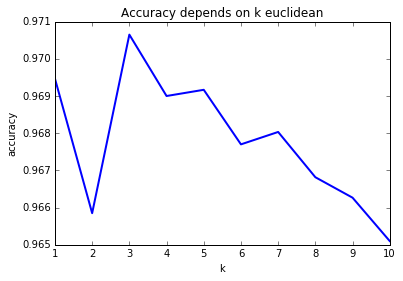

*
*
*
*
*
*
*
*
*
*


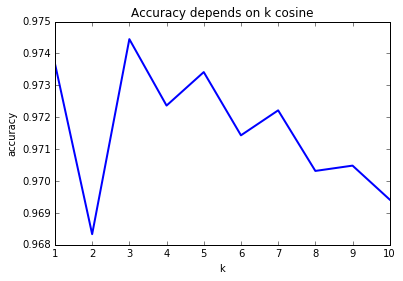

In [7]:
accuracy_plot(False)

При любой метрике лучший результат оказался при k = 3.

Так же стоит отметить, что при увеличении числа соседей, участвующих в голосовании, точность алгоритма снижается.

Теперь нарисуем графики зависимости точности от количества рассматриваемых соседей при условии того, что используется взвешенный алгоритм.

В нашем случае голос каждого алгоритма равен 1/(distance + ε), где ε — малое число.

*
*
*
*
*
*
*
*
*
*


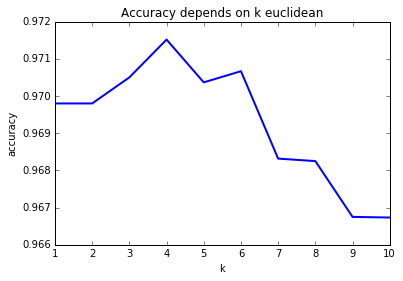

*
*
*
*
*
*
*
*
*
*


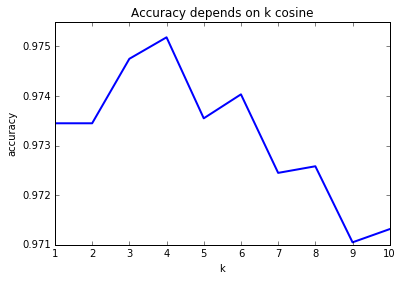

In [10]:
accuracy_plot(True)

Как видно из графиков: наиболее точным оказался взвешенный алгоритм, использующий косинусную метрику. На его основании мы и сделаем финальное предсказание.

Стоит отметить, что при введение весов изменяется оптимальное значение количества соседей.

Сравним скорости работы алгоритмов в зависимости от метрики.

In [8]:
def time_it(metric, weights, k_list):
    start = time.clock()
    %time cv.knn_cross_val_score(X=train_data, y=train_target, k_list=k_list, score='accuracy', cv=folds, weights=weights, metric=metric, strategy='brute', test_block_size=None)
    return time.clock()-start

In [11]:
euclidean_not_weighted = time_it('euclidean', False, [3])

CPU times: user 3min 50s, sys: 6min 17s, total: 10min 8s
Wall time: 11min 11s


In [12]:
euclidean_weighted = time_it('euclidean', True, [3])

CPU times: user 4min 7s, sys: 5min 57s, total: 10min 5s
Wall time: 10min 51s


In [13]:
cosine_not_weighted = time_it('cosine', False, [3])

CPU times: user 4min 40s, sys: 6min 53s, total: 11min 33s
Wall time: 18min 6s


In [14]:
cosine_weighted = time_it('cosine', True, [3])

CPU times: user 5min 2s, sys: 6min 55s, total: 11min 57s
Wall time: 18min 51s


In [15]:
table = dict()
table['Metric'] = ['euclidean', 'euclidean', 'cosine', 'cosine']
table['Weights'] = [False, True, False, True]
table['Time'] = [euclidean_not_weighted, euclidean_weighted, cosine_not_weighted, cosine_weighted]

In [16]:
df = pd.DataFrame(data=table)

In [17]:
df

,Metric,Time,Weights
0,euclidean,608.061792,False
1,euclidean,605.120049,True
2,cosine,693.785971,False
3,cosine,717.403703,True


Наиболее быстрым, как видно из таблицы, оказался взвешенный алгоритм с евклидовой метрикой. 

Применяем лучший алгоритм к исходной выборке:

In [23]:
clf = knn.KNN_classifier(k=4, metric='cosine', weights=True, strategy='brute', test_block_size=None)
clf.fit(train_data, train_target)
y_pred = clf.predict(test_data)

In [26]:
print('Accuracy score =', cv.accuracy_score(y_pred, test_target))

Accuracy score = 0.9752


Сравним с точностью на кросс-валидации:

In [25]:
cross_v = cv.knn_cross_val_score(X=train_data, y=train_target, k_list=[4], score='accuracy', cv=folds, weights=True, metric='cosine', strategy='brute', test_block_size=None)

In [27]:
cross_v

{4: [0.9747, 0.9761, 0.9756]}

MNIST - отличный набор данных, на котором очень хорошо обучаться. Наиболее эффективные алгоритмы распознавания этого набора данных используют нейронные сети. Точность распознавания более 99,72. Но даже простой алгоритм KNN способен добиться неплохих результатов.

Так почему же возникают ошибки? Для выяснения этого следует посмотреть, что представляют собой данные, которые алгоритм отнес к неправильным классам.

Выведем те числа, на которых алгоритм ошибся:

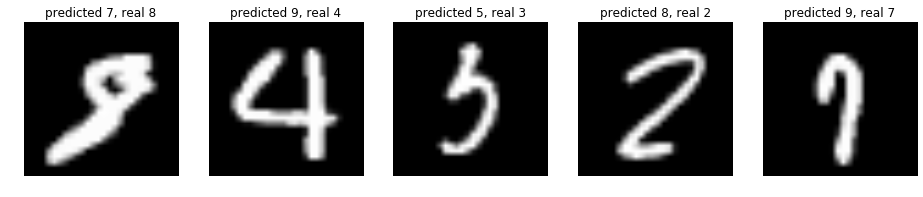

In [70]:
fig = plt.figure(figsize=(16, 6))
number = 5
for repeat in range(number):
    ind = np.random.randint(0, len(test_target))
    while y_pred[ind] == test_target[ind]:
        ind = np.random.randint(0, len(y_pred))

    img = np.reshape(test_data[ind], (28, 28))[:, :, np.newaxis]
    img = np.repeat(img, 3, axis=2)
    ax = plt.subplot(1, number, repeat+1)
    ax.set_title('predicted %d, real %d' % (y_pred[ind], test_target[ind]))
    plt.axis("off")
    plt.imshow(img, cmap = "Greys")

Из данных тестов видно, что лучшим является взвешенный алгоритм с косинусной метрикой.

Можно заметить, что не все числа хорошо воспринимаемы и человеком. Из общих черт стоит выделить, что эти числа недописаны или написаны очень специфическим почерком.

Теперь рассмотрим матрицу ошибок, для наибольшей наглядности воспользуемся раскраской матрицы. Функция plot_confusion_matrix взята из примеров в документации sklearn и немного упрощена для удобства пользования.

In [54]:
def plot_confusion_matrix(cm, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

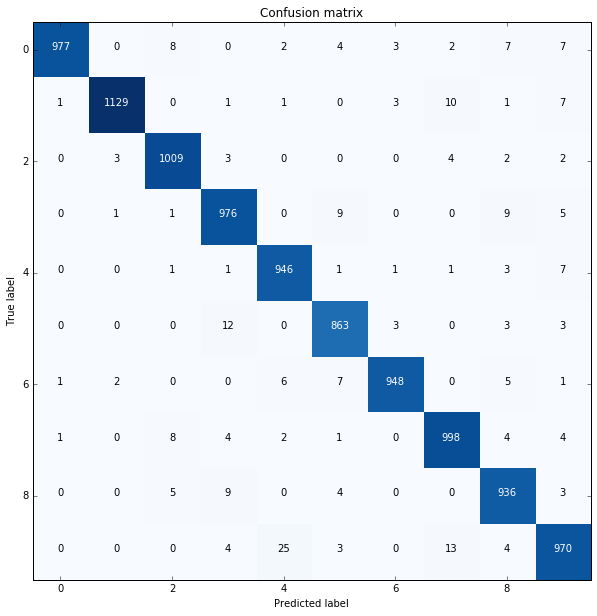

In [55]:
cnf_matrix = confusion_matrix(y_pred, test_target)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, 'Confusion matrix')

В матрице ошибок на главной диагонали стоят правильно предсказанные элементы. 

Чем меньше числа вне диагонали - тем выше точность. 

По данной матрице можно так же понять какие ошибки допустил алгоритм. Например, сильно бросается в глаза, что 25 девяток алгоритм принял за четверки.

Данная матрица очень универсальна, с ее помощью можно получить множество метрик качества.